In [29]:
import math
import opstrat as op
from optionprice import Option
from yahoo_fin import options

In [3]:
def buyshares(capital, shareprice):
    return math.floor(capital / shareprice)

In [10]:
s0 = 333

In [11]:
mycapital = 100000

In [12]:
nmshares = buyshares(mycapital, s0)
nmshares

300

In [13]:
def CalculatePnL(sellPrice, buyPrice, numShares):
    return round(numShares * (sellPrice - buyPrice), 2)

In [16]:
s_end = 345
cash_pnl = CalculatePnL(s_end, s0, nmshares)
cash_pnl

3600

In [17]:
def CalculatePctReturn(fundsOut, fundsIn):
    return round(fundsOut / fundsIn * 100, 2)

In [18]:
CalculatePctReturn(cash_pnl, mycapital)

3.6

In [20]:
# when i can borrow particular amount from the market, or can finance only some from my side
def FinanceShares(capital, share_price, fin_pct=0.5):
    return buyshares(capital/0.5, share_price)

In [22]:
num_of_lvg_shares = FinanceShares(mycapital, s0)
num_of_lvg_shares

600

In [23]:
lvg_pnl = CalculatePnL(s_end, s0, num_of_lvg_shares)
lvg_pnl

7200

In [25]:
CalculatePctReturn(lvg_pnl, mycapital)

7.2

In [30]:
nflx_dates = options.get_expiration_dates("NFLX")

In [31]:
len(nflx_dates)

14

In [32]:
callsNflx = options.get_calls("NFLX")

In [33]:
callsNflx.columns

Index(['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid',
       'Ask', 'Change', '% Change', 'Volume', 'Open Interest',
       'Implied Volatility'],
      dtype='object')

### Let's choose option that is 10 away from current price, OTM call, current netflix share price is around 294, so lets choose strike price to be 305

In [34]:
myOption = callsNflx[callsNflx['Strike'] == 305]

In [35]:
myOption

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
41,NFLX221230C00305000,2022-12-23 3:59PM EST,305.0,2.08,1.96,2.07,-2.27,-52.18%,3068,1044,37.45%


In [36]:
opt = myOption['Last Price']

In [37]:
# sigma is realized vol calculated seperately
nflx_call = Option(european=True, kind="call", s0=295, k =305, t=4, sigma=0.573, r=0, dv=0)
opt_price_calculated = round(nflx_call.getPrice(),4)

In [38]:
#roughly close to what we see above but still not exact
opt_price_calculated

3.2584

### We buy option in multiple of 100

In [39]:
nflxopt1 = 100*opt_price_calculated

In [40]:
numCallOptions = buyshares(mycapital, nflxopt1)
numCallOptions

306

### Suppose the underlying stock price move to 310, so what will be the profit?

In [43]:
nflx_call_different_strike = Option(european=True, kind="call", s0=310, k = 305, t=4, sigma=0.573, r=0, dv=0)
opt_price_calculated_final = round(nflx_call_different_strike.getPrice(),4)

In [44]:
opt_price_calculated_final

10.1261

In [47]:
#Pnl
optPnl = CalculatePnL(opt_price_calculated_final*100, opt_price_calculated*100, numCallOptions)
optPnl

210151.62

## Bull Spread Strategy, buy a call option at lower strike (OTM) and sell another call at higher strike (OTM)

In [51]:
s0 = 295
print(f"Current Stock price fo netflix is: {s0}")

Current Stock price fo netflix is: 295


In [67]:
nflxCall1 = Option(
    european=True, kind="call", s0=295, k=305, t=4, sigma=0.573, r=0.0, dv=0
)
nflxOpt1 = round(nflxCall1.getPrice(), 4)

In [68]:
nflxCall2 = Option(
    european=True, kind="call", s0=295, k=315, t=4, sigma=0.573, r=0.0, dv=0
)
nflxOpt2 = round(nflxCall2.getPrice(), 4)

In [69]:
print(nflxOpt1, nflxOpt2)

3.2584 1.2704


In [70]:
nflxSpr1 = nflxOpt1 - nflxOpt2

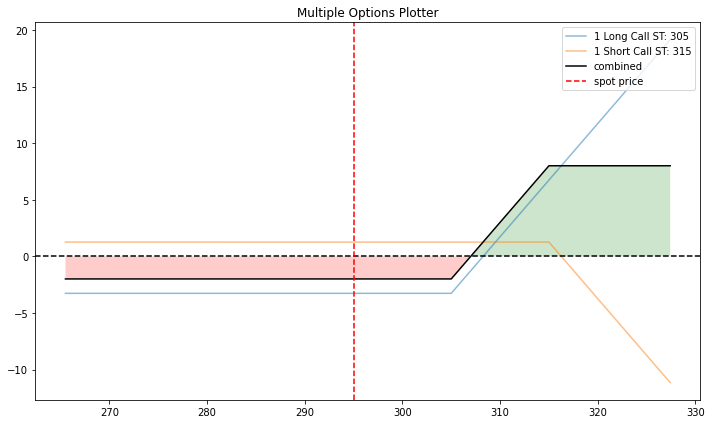

In [71]:
myCall1 = {"op_type": "c", "strike": 305, "tr_type": "b", "op_pr": nflxOpt1}
myCall2 = {"op_type": "c", "strike": 315, "tr_type": "s", "op_pr": nflxOpt2}
op_list = [myCall1, myCall2]
op.multi_plotter(spot=295, spot_range=10, op_list=op_list)

In [74]:
nflxOptB = (nflxOpt1 - nflxOpt2) * 100
numSpreadOptions = buyshares(mycapital, nflxOptB)
numSpreadOptions

503

### Suppose the underlying stock price move to 310, so what will be the profit uner bull spread strategy, we are computing profit under option portfolio assuming we are not executing the option?

In [77]:
nflxCall3 = Option(
    european=True, kind="call", s0=310, k=305, t=4, sigma=0.573, r=0.0, dv=0
)
nflxOpt3 = round(nflxCall3.getPrice(), 4)
nflxCall4 = Option(
    european=True, kind="call", s0=310, k=315, t=4, sigma=0.573, r=0.0, dv=0
)
nflxOpt4 = round(nflxCall4.getPrice(), 4)
print([nflxOpt3, nflxOpt4])
nflxSpr2 = nflxOpt3 - nflxOpt4

[10.1261, 5.2414]


In [78]:
sprPnL = CalculatePnL(nflxSpr2, nflxSpr1, numCallOptions)
sprPnL

886.39

In [79]:
CalculatePctReturn(sprPnL, mycapital)

0.89